In [1]:
from __future__ import print_function, division
from PyAstronomy import pyasl

# Instantiate the solver
ks = pyasl.MarkleyKESolver()

# Solves Kepler's Equation for a set
# of mean anomaly and eccentricity.
# Uses the algorithm presented by
# Markley 1995.
M = 0.75
e = 0.3
print("Eccentric anomaly: ", ks.getE(M, e))

Eccentric anomaly:  1.0029122772944794


Shape of output array:  (200, 3)
x, y, z for 50th point:  [-9.64896297e-01 -2.64190222e-01 -3.90536595e-07]


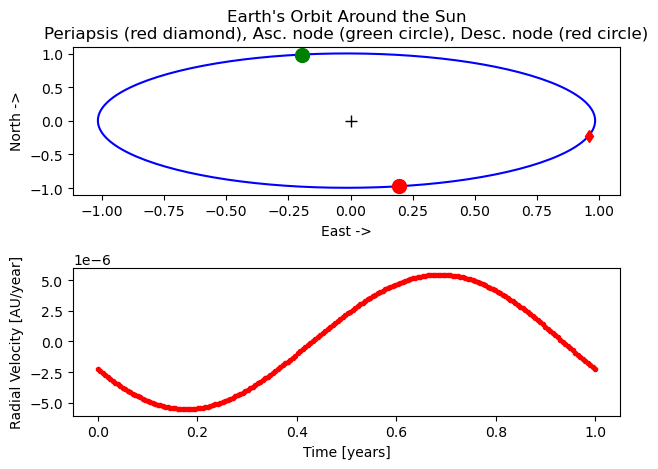

In [2]:
# Simple Earth Kepler Orbit
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy.pyasl import KeplerEllipse

# Instantiate Earth's orbit (1 AU, 1 year)
ke = KeplerEllipse(1.0, 1.0, e=0.0167, Omega=-11.26064, i=0.00005, w=114.20783)

# Time axis (one orbital period)
t = np.linspace(0, 1.0, 200)

# Position and velocity
pos = ke.xyzPos(t)
vel = ke.xyzVel(t)
radius = ke.radius(t)

# Nodes of orbit (LOS observer at -z)
ascn, descn = ke.xyzNodes_LOSZ()

# Output some values
print("Shape of output array: ", pos.shape)
print("x, y, z for 50th point: ", pos[50, :])

# Plot orbital path (x vs y) and radial velocity
plt.subplot(2, 1, 1)
plt.title("Earth's Orbit Around the Sun\nPeriapsis (red diamond), Asc. node (green circle), Desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)  # Sun at origin
plt.plot(pos[:, 1], pos[:, 0], 'b-')
plt.plot([pos[0, 1]], [pos[0, 0]], 'rd')  # Periapsis
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)  # Ascending node
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)  # Descending node

# Plot radial velocity
plt.subplot(2, 1, 2)
plt.xlabel("Time [years]")
plt.ylabel("Radial Velocity [AU/year]")
plt.plot(t, vel[:, 2], 'r.-')
plt.tight_layout()
plt.show()

In [3]:
#Calculate Earth's Orbital Speed

ke = KeplerEllipse(1.0, 1.0, e=0.0167)  # AU and years

# Choose time near perihelion (or any point)
t = np.linspace(0, 1.0, 200)
vel = ke.xyzVel(t)

# Speed = magnitude of velocity vector
speed = np.linalg.norm(vel, axis=1)
speed

array([6.38900548, 6.38895046, 6.38878548, 6.38851073, 6.38812651,
       6.38763328, 6.3870316 , 6.38632216, 6.38550579, 6.38458342,
       6.38355611, 6.38242503, 6.38119149, 6.37985688, 6.37842274,
       6.3768907 , 6.3752625 , 6.37353998, 6.37172509, 6.36981988,
       6.36782649, 6.36574717, 6.36358424, 6.36134011, 6.35901727,
       6.35661831, 6.35414588, 6.3516027 , 6.34899155, 6.3463153 ,
       6.34357687, 6.34077922, 6.33792538, 6.33501842, 6.33206147,
       6.32905767, 6.32601023, 6.32292237, 6.31979734, 6.31663844,
       6.31344896, 6.31023222, 6.30699155, 6.30373029, 6.3004518 ,
       6.29715941, 6.29385649, 6.29054636, 6.28723237, 6.28391783,
       6.28060606, 6.27730033, 6.27400393, 6.27072009, 6.26745203,
       6.26420292, 6.26097593, 6.25777417, 6.25460071, 6.25145858,
       6.24835079, 6.24528027, 6.24224992, 6.23926259, 6.23632108,
       6.23342811, 6.23058639, 6.22779851, 6.22506707, 6.22239454,
       6.21978338, 6.21723595, 6.21475457, 6.21234146, 6.20999